In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
import itertools
from keras.layers import LSTM
from keras import layers

In [2]:
BTC_01 = pd.read_csv('BTCUSDC/BTCUSDC-1m-2022-01.csv')
BTC_02 = pd.read_csv('BTCUSDC/BTCUSDC-1m-2022-02.csv')
BTC_03 = pd.read_csv('BTCUSDC/BTCUSDC-1m-2022-03.csv')
BTC_04 = pd.read_csv('BTCUSDC/BTCUSDC-1m-2022-04.csv')
BTC_05 = pd.read_csv('BTCUSDC/BTCUSDC-1m-2022-05.csv')
BTC_06 = pd.read_csv('BTCUSDC/BTCUSDC-1m-2022-06.csv')
BTC_07 = pd.read_csv('BTCUSDC/BTCUSDC-1m-2022-07.csv')
BTC_08 = pd.read_csv('BTCUSDC/BTCUSDC-1m-2022-08.csv')
BTC_09 = pd.read_csv('BTCUSDC/BTCUSDC-1m-2022-09.csv')

ETH_01 = pd.read_csv('ETHUSDC/ETHUSDC-1m-2022-01.csv')
ETH_02 = pd.read_csv('ETHUSDC/ETHUSDC-1m-2022-02.csv')
ETH_03 = pd.read_csv('ETHUSDC/ETHUSDC-1m-2022-03.csv')
ETH_04 = pd.read_csv('ETHUSDC/ETHUSDC-1m-2022-04.csv')
ETH_05 = pd.read_csv('ETHUSDC/ETHUSDC-1m-2022-05.csv')
ETH_06 = pd.read_csv('ETHUSDC/ETHUSDC-1m-2022-06.csv')
ETH_07 = pd.read_csv('ETHUSDC/ETHUSDC-1m-2022-07.csv')
ETH_08 = pd.read_csv('ETHUSDC/ETHUSDC-1m-2022-08.csv')
ETH_09 = pd.read_csv('ETHUSDC/ETHUSDC-1m-2022-09.csv')

In [3]:
BTC_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44639 entries, 0 to 44638
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   1640995200000     44639 non-null  int64  
 1   46216.40000000    44639 non-null  float64
 2   46265.18000000    44639 non-null  float64
 3   46216.40000000.1  44639 non-null  float64
 4   46263.39000000    44639 non-null  float64
 5   0.54812000        44639 non-null  float64
 6   1640995259999     44639 non-null  int64  
 7   25341.47911960    44639 non-null  float64
 8   14                44639 non-null  int64  
 9   0.53095000        44639 non-null  float64
 10  24547.94353160    44639 non-null  float64
 11  0                 44639 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 4.1 MB


In [4]:
columns = ['open_time', 'open'	, 'high','low',	'close','volume',	'close_time','quote_volume',
'count'	,'taker_buy_volume','taker_buy_quote_volume',	'ignore']

In [5]:
for df in [BTC_01, BTC_02, BTC_03, BTC_04, BTC_05, BTC_06, BTC_07, BTC_08, BTC_09]:
  df.columns = columns

for df in [ETH_01, ETH_02, ETH_03, ETH_04, ETH_05, ETH_06, ETH_07, ETH_08, ETH_09]:
  df.columns = columns

In [6]:
BTC = pd.concat([BTC_01, BTC_02, BTC_03, BTC_04, BTC_05, BTC_06, BTC_07, BTC_08, BTC_09])
ETH = pd.concat([ETH_01, ETH_02, ETH_03, ETH_04, ETH_05, ETH_06, ETH_07, ETH_08, ETH_09])

In [7]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390411 entries, 0 to 40498
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   open_time               390411 non-null  int64  
 1   open                    390411 non-null  float64
 2   high                    390411 non-null  float64
 3   low                     390411 non-null  float64
 4   close                   390411 non-null  float64
 5   volume                  390411 non-null  float64
 6   close_time              390411 non-null  int64  
 7   quote_volume            390411 non-null  float64
 8   count                   390411 non-null  int64  
 9   taker_buy_volume        390411 non-null  float64
 10  taker_buy_quote_volume  390411 non-null  float64
 11  ignore                  390411 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 38.7 MB


In [8]:
ETH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390411 entries, 0 to 40498
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   open_time               390411 non-null  int64  
 1   open                    390411 non-null  float64
 2   high                    390411 non-null  float64
 3   low                     390411 non-null  float64
 4   close                   390411 non-null  float64
 5   volume                  390411 non-null  float64
 6   close_time              390411 non-null  int64  
 7   quote_volume            390411 non-null  float64
 8   count                   390411 non-null  int64  
 9   taker_buy_volume        390411 non-null  float64
 10  taker_buy_quote_volume  390411 non-null  float64
 11  ignore                  390411 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 38.7 MB


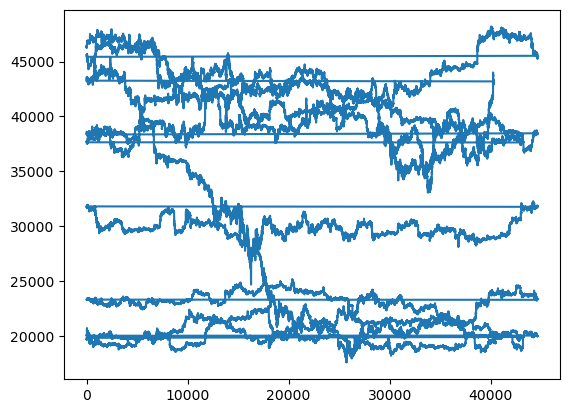

In [9]:
plt.plot(BTC['close'])

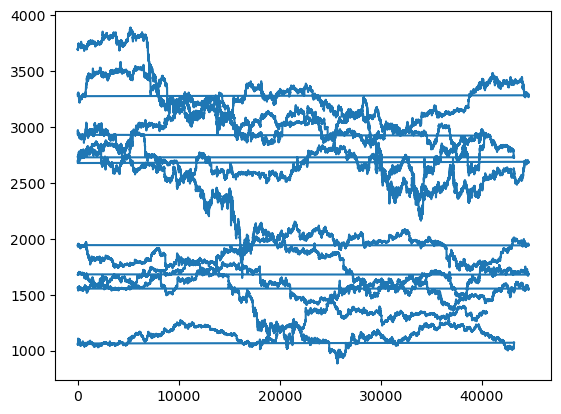

In [10]:
plt.plot(ETH['close'])

<Axes: >

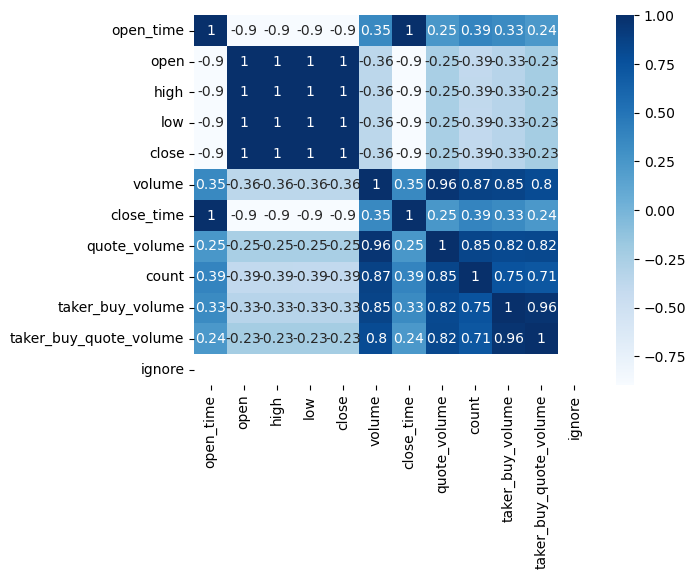

In [29]:
sns.heatmap(BTC.corr(), annot=True, cmap='Blues')

<Axes: >

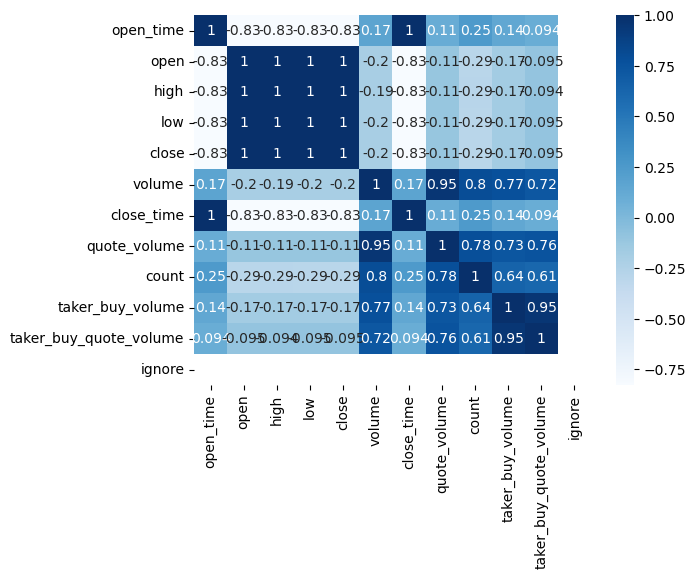

In [30]:
sns.heatmap(ETH.corr(), annot=True, cmap='Blues')

In [32]:
BTC.columns

Index(['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_volume', 'count', 'taker_buy_volume', 'taker_buy_quote_volume',
       'ignore'],
      dtype='object')

In [33]:
BTC = BTC.drop(['open', 'high', 'low'], axis=1)
ETH = ETH.drop(['open', 'high', 'low'], axis=1)

print(BTC.columns)
print(ETH.columns)

Index(['open_time', 'close', 'volume', 'close_time', 'quote_volume', 'count',
       'taker_buy_volume', 'taker_buy_quote_volume', 'ignore'],
      dtype='object')
Index(['open_time', 'close', 'volume', 'close_time', 'quote_volume', 'count',
       'taker_buy_volume', 'taker_buy_quote_volume', 'ignore'],
      dtype='object')


In [35]:
BTC = BTC.drop(['open_time'], axis=1)
ETH = ETH.drop(['open_time'], axis=1)

<Axes: >

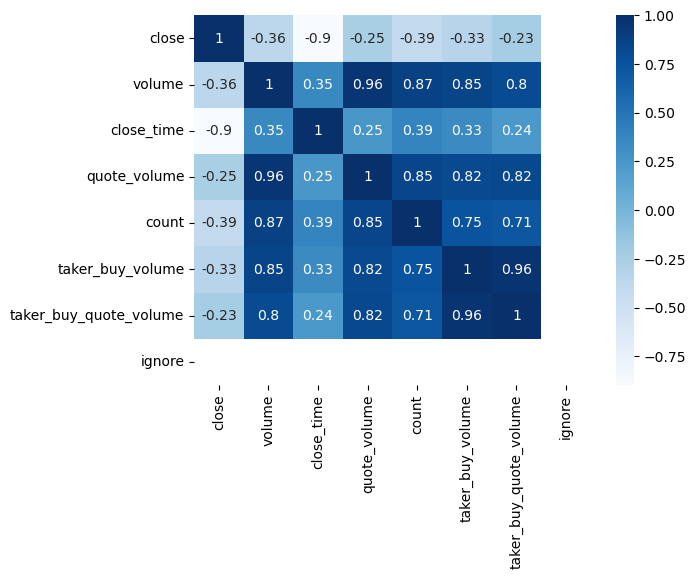

In [36]:
sns.heatmap(BTC.corr(), annot=True, cmap='Blues')

In [41]:
BTC = BTC.set_index('close_time')
BTC.head()

,close,volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore
close_time,,,,,,,
1640995319999,46308.00,0.39329,18198.762994,32,0.21580,9986.602776,0
1640995379999,46372.24,0.72386,33545.643230,35,0.50564,23435.068264,0
1640995439999,46332.09,0.26683,12367.673492,8,0.26117,12105.085631,0
1640995499999,46333.53,0.07220,3344.853233,8,0.05732,2655.621907,0
1640995559999,46436.05,0.34697,16080.499749,15,0.26227,12153.046910,0


In [42]:
ETH = ETH.set_index('close_time')
ETH.head()

,close,volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore
close_time,,,,,,,
1640995319999,3691.38,3.9854,14694.495983,17,2.9374,10830.028477,0
1640995379999,3692.05,3.7682,13903.973097,14,0.7315,2700.310520,0
1640995439999,3692.03,0.5819,2147.897479,7,0.3269,1206.502784,0
1640995499999,3689.79,0.2982,1100.295378,1,0.0000,0.000000,0
1640995559999,3699.95,6.1382,22652.819741,17,1.2831,4739.131384,0


In [43]:
BTC = BTC.drop(['ignore'], axis=1)

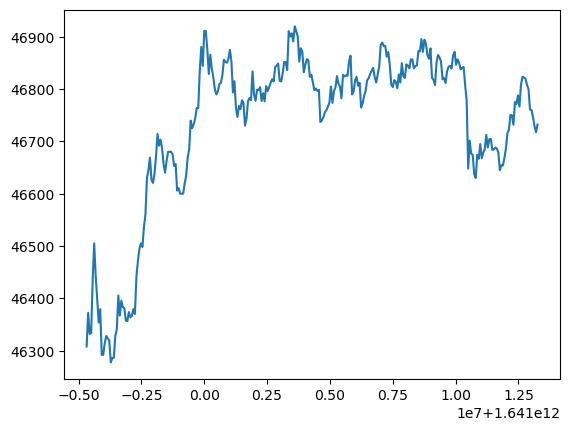

In [44]:
recent_close = BTC['close'][:300]
plt.plot(BTC.index[:300], recent_close)
plt.show()

In [45]:
idx = int(0.8*len(BTC))
idx

312328

In [46]:
train = BTC.iloc[:idx, :]
test = BTC.iloc[idx:, :]

train.shape, test.shape

((312328, 6), (78083, 6))

In [49]:
X_train = train.drop(['close'], axis = 1)
y_train = train['close']
X_test = test.drop(['close'], axis = 1)
y_test = test['close']

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(312328, 5) (312328,)
(78083, 5) (78083,)


In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [51]:
def transform_timestamps(X, y, time_steps):
  feature_list = []
  label_list = []
  for i in range(len(X) - time_steps):
    feature_list.append(X[i:i+time_steps])
    label_list.append(y[i+time_steps])
  return np.array(feature_list), np.array(label_list)

In [52]:
X_train_batch, y_train_batch = transform_timestamps(X_train, y_train, 15)

In [24]:
# train_X = train_X.values.reshape(train_X.shape[0], 1, 1)
# test_X = test_X.values.reshape(test_X.shape[0], 1, 1)

In [53]:
X_train_batch.shape, y_train_batch.shape

((312313, 15, 5), (312313,))

In [54]:
model = Sequential()
model.add(LSTM(1024, input_shape=(X_train_batch.shape[1], X_train_batch.shape[2])))
model.add(layers.Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 1024)              4218880   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 4744193 (18.10 MB)
Trainable params: 4744193 (18.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
history = model.fit(X_train_batch, y_train_batch, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/20
7808/7808 [==============================] - 931s 119ms/step - loss: 74097528.0000 - val_loss: 220417600.0000
Epoch 2/20
7808/7808 [==============================] - 970s 124ms/step - loss: 38885644.0000 - val_loss: 77415272.0000
Epoch 3/20
7808/7808 [==============================] - 969s 124ms/step - loss: 14151014.0000 - val_loss: 8344218.5000
Epoch 4/20
7808/7808 [==============================] - 976s 125ms/step - loss: 10441392.0000 - val_loss: 10557232.0000
Epoch 5/20
7808/7808 [==============================] - 961s 123ms/step - loss: 9269470.0000 - val_loss: 4957284.0000
Epoch 6/20
7808/7808 [==============================] - 946s 121ms/step - loss: 7678541.5000 - val_loss: 10745091.0000
Epoch 7/20
7808/7808 [==============================] - 1002s 128ms/step - loss: 5763829.5000 - val_loss: 5090035.5000
Epoch 8/20
7808/7808 [==============================] - 1033s 132ms/step - loss: 4530647.0000 - val_loss: 2311951.5000
Epoch 9/20
7808/7808 [=======================

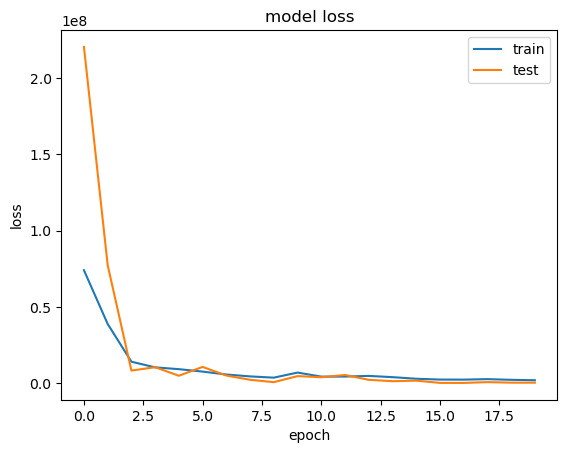

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [58]:
from keras.metrics import MeanSquaredError

y_pred = model.predict(X_test)
print(y_pred)
print("Mean Squared Error: ", MeanSquaredError()(y_test, y_pred).numpy())

ValueError: in user code:

    File "/Users/jeong-yonghun/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "/Users/jeong-yonghun/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/jeong-yonghun/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/jeong-yonghun/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py", line 2283, in predict_step
        return self(x, training=False)
    File "/Users/jeong-yonghun/anaconda3/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/jeong-yonghun/anaconda3/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 15, 5), found shape=(None, 5)
